----
#**Predictive Maintenance Capstone Project Part 3**
#Operationalization of Classification Algorithms for Targeted Failure Prediction

**Abstract:**

Predictive Maintenance Capstone Project Part 3 focuses on Dataset Partitioning for Model Training and Evaluation, and the operationalization of Classification Algorithms for Targeted Failure Prediction. The script systematically implements and evaluates various classifiers such as XGBoost, Random Forest, K-Nearest Neighbors, Support Vector Machine, Logistic Regression, and Multilayer Perceptron Neural Network. The accuracy metrics and confusion matrix visualizations provide a detailed understanding of each model's performance in predicting equipment failures across distinct categories. The final section presents a comparative analysis of these models through a structured PrettyTable and a set of insightful confusion matrix heatmaps, offering a comprehensive overview of their effectiveness in the context of predictive maintenance.

----
#**Data Loading & Preprocessing**
The requisite libraries have been imported for the data science project. Subsequently, Google Drive has been successfully mounted, facilitating access to the pre-scaled dataset from Part 2 of the project. The dataset is efficiently loaded into a Pandas DataFrame for further analysis and modeling.

In [321]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [322]:
path = '/content/drive/MyDrive/Predictive_Maintenance_CapProject/Predictive_Maintenance_Classification_Scaled.csv'
df_raw = pd.read_csv(path)

In [323]:
df = df_raw

----
#**Data Segmentation for Dependent & Independent Variables**


In [324]:
df.columns

Index(['machineID', 'datetime', 'volt_min_3h', 'rotate_min_3h',
       'pressure_min_3h', 'vibration_min_3h', 'volt_min_24h', 'rotate_min_24h',
       'pressure_min_24h', 'vibration_min_24h', 'volt_max_3h', 'rotate_max_3h',
       'pressure_max_3h', 'vibration_max_3h', 'volt_max_24h', 'rotate_max_24h',
       'pressure_max_24h', 'vibration_max_24h', 'volt_mean_3h',
       'rotate_mean_3h', 'pressure_mean_3h', 'vibration_mean_3h',
       'volt_mean_24h', 'rotate_mean_24h', 'pressure_mean_24h',
       'vibration_mean_24h', 'volt_std_3h', 'rotate_std_3h', 'pressure_std_3h',
       'vibration_std_3h', 'volt_std_24h', 'rotate_std_24h',
       'pressure_std_24h', 'vibration_std_24h', 'maint_comp1', 'maint_comp2',
       'maint_comp3', 'maint_comp4', 'dslmaint_comp1', 'dslmaint_comp2',
       'dslmaint_comp3', 'dslmaint_comp4', 'age', 'model_model1',
       'model_model2', 'model_model3', 'model_model4', 'errorID_error1',
       'errorID_error2', 'errorID_error3', 'errorID_error4', 'errorID_e

This code segregates the dataset into features (X) and the target variable (y), with X excluding 'machineID', 'datetime', and 'failure'. The target variable 'failure' undergoes categorical label encoding for numerical representation.

In [325]:
X = df.drop(['machineID','datetime','failure'], axis = 1).values
y = df[['failure']]

In [326]:
y['failure'].replace({'nofail': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}, inplace=True)
y = y.values    # Convert the Panda Dataframe 'y' into Numpy array

<ipython-input-326-bbfb7cbe2e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['failure'].replace({'nofail': 0, 'comp1': 1, 'comp2': 2, 'comp3': 3, 'comp4': 4}, inplace=True)


----
#**Dataset Partitioning for Model Training and Evaluation**

Splitting the dataset into training and testing set with 80% of the data is used for training and 20% is used for testing.


In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1)

----
#**Operationalizing Classification Algorithms for Targeted Failure Prediction**
The code snippet implements and evaluates multiple classification algorithms, including XGBoost, Random Forest, K-Nearest Neighbors, Support Vector Machine, Logistic Regression, and a MultiLayer Perceptron Neural Network. It calculates and prints accuracy metrics for each class, transforming labels for evaluation, and visualizes the confusion matrices to assess model performance. This comprehensive approach enables a comparative analysis of diverse machine learning models for predicting equipment failures based on the provided features.

----
#XGBoost Classification Algorithm

Even though its a multiclass classification problem, we use objective as 'binary:logistic' because since its a multi-output classifier, it treats each output as an independednt binary classification task.

In [329]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

# Creating a multi-output classifier with XGBoost using binary logistic as the objective
xgb_classifier = MultiOutputClassifier(XGBClassifier(objective='binary:logistic'))

# Training the classifier on the training set
xgb_classifier.fit(X_train, y_train)

# Generating predictions on the test set using the trained model
xgboost_pred = xgb_classifier.predict(X_test)

Accuracy for each custom label based on the true and predicted labels from the XGBoost classifier, offering a detailed view of model performance across different classes.

In [330]:
# Mapping numeric labels to custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}

# True labels and predicted labels are flattened
xgboost_true_test = y_test.flatten()
xgboost_pred = xgb_classifier.predict(X_test).flatten()

unique_labels = np.unique(xgboost_true_test)

# Variables to store accuracies for each custom label
xgb_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (xgboost_true_test == label).astype(int)
    label_pred = (xgboost_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Retrieving mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    xgb_accuracy[f'xgb_accuracy_{custom_label}'] = label_accuracy

# Accuracy for each label
for key, value in xgb_accuracy.items():
    print(f'{key}: {value}')

xgb_accuracy_nofail: 0.9998803030043946
xgb_accuracy_comp1: 0.9996580085839846
xgb_accuracy_comp2: 0.9996922077255861
xgb_accuracy_comp3: 0.9998632034335938
xgb_accuracy_comp4: 0.9997435064379884


Confusion Matrix Data Visualization Using Seaborn HeatMap

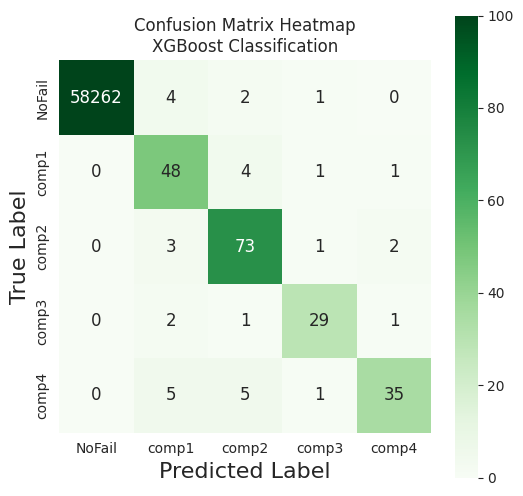

In [331]:
xgboost_true_test = y_test.flatten()

# Confusion Matrix is calculated
cm = confusion_matrix(xgboost_true_test, xgboost_pred)

# Creating a Heatmap using Seaborn library
plt.figure(figsize=(6, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nXGBoost Classification', fontsize=12)

plt.show()

----
#Random Forest Classification Algorithm

This code establishes and trains a Random Forest Classifier with 100 decision trees on the provided training data (X_train and y_train). After training, the model is used to predict outcomes on the test set (X_test).

In [332]:
from sklearn.ensemble import RandomForestClassifier

#Initializes a Random Forest classifier with 100 decision trees and a fixed random state for reproducibility.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_classifier.predict(X_test)

<ipython-input-332-156200019c50>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


In this section, a mapping dictionary is established to associate numeric labels with custom labels representing different machine component failures. The Random Forest classifier is evaluated on the test set, and accuracies are calculated for each custom label. The results, stored in the rf_accuracy dictionary, provide a detailed breakdown of the model's predictive performance for individual failure categories.

In [333]:
# Create a mapping dictionary for custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}

rf_true_test = y_test.flatten()
rf_pred = rf_classifier.predict(X_test).flatten()

# Get unique numeric labels
unique_labels = np.unique(rf_true_test)

# Create variables to store accuracies for each custom label
rf_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (rf_true_test == label).astype(int)
    label_pred = (rf_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Use the mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    rf_accuracy[f'rf_accuracy_{custom_label}'] = label_accuracy

# printing the accuracies from created dictionary
for key, value in rf_accuracy.items():
    print(f'{key}: {value}')

rf_accuracy_nofail: 0.999846103862793
rf_accuracy_comp1: 0.9996580085839846
rf_accuracy_comp2: 0.9996922077255861
rf_accuracy_comp3: 0.9998632034335938
rf_accuracy_comp4: 0.9997093072963869


Visualizing the confusion matrix of the Random Forest classifier, providing insights into its performance by comparing true and predicted labels for different machine component failures. The heatmap, annotated with accuracy metrics, enhances the interpretability of the model's predictive capabilities across diverse failure categories.

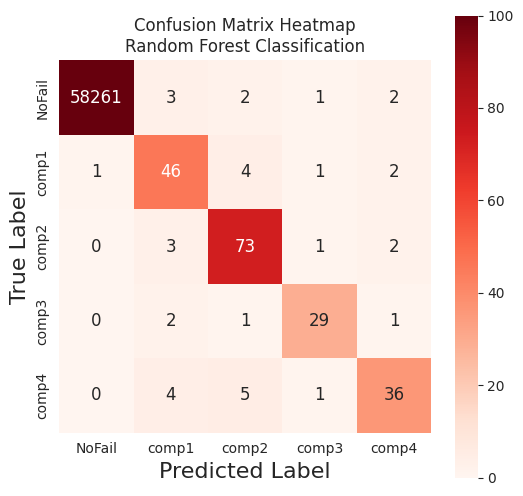

In [334]:
rfclassifer_true_test = y_test.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(rf_true_test, rf_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap='Reds', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nRandom Forest Classification', fontsize=12)

plt.show()

----
#K-Nearest Neighbor Classifier

A K-Nearest Neighbor classifier with five neighbors is instantiated, trained on the provided training data, and applied to make predictions on the test set. The model's accuracy is then computed and displayed, reflecting its performance in classifying machine component failures.

In [335]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a K-Nearest Neighbor classifier with five neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn_classifier.predict(X_test)

# Accuracy of the model
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbor Accuracy: {knn_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbor Accuracy: 0.9989740257519536


This code section creates a mapping dictionary for custom labels, flattens true labels, and generates predictions using the K-Nearest Neighbor classifier. It then calculates and stores accuracies for each custom label based on the true and predicted labels, providing a detailed performance evaluation.

In [336]:
# Create a mapping dictionary for custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}
# knn_true_test and knn_pred are true labels and predicted labels
knn_true_test = y_test.flatten()
knn_pred = knn_classifier.predict(X_test)

# Get unique numeric labels
unique_labels = np.unique(knn_true_test)

# Create variables to store accuracies for each custom label
knn_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (knn_true_test == label).astype(int)
    label_pred = (knn_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    knn_accuracy[f'knn_accuracy_{custom_label}'] = label_accuracy

# print the accuracy dictionary
for key, value in knn_accuracy.items():
    print(f'{key}: {value}')

knn_accuracy_nofail: 0.9993673158803714
knn_accuracy_comp1: 0.9995725107299807
knn_accuracy_comp2: 0.9995725107299807
knn_accuracy_comp3: 0.9997948051503908
knn_accuracy_comp4: 0.9996409090131838


This code segment utilizes Seaborn and Matplotlib to visualize the confusion matrix heatmap for the K-Nearest Neighbor classifier. The heatmap displays the relationship between true and predicted labels, aiding in the interpretation of classification performance.

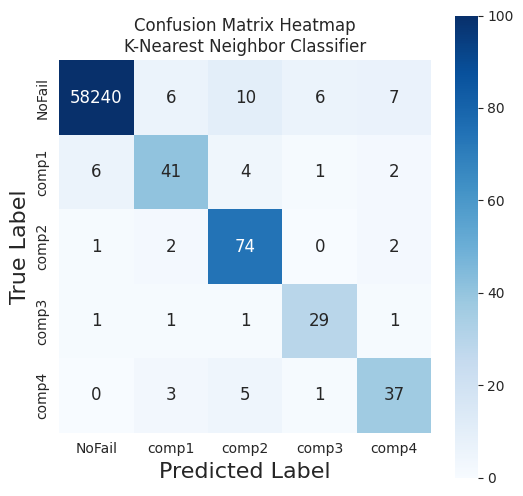

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

knn_true_test = y_test.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(knn_true_test, knn_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nK-Nearest Neighbor Classifier', fontsize=12)

plt.show()

----
#Support Vector Machine Classifier

A linear Support Vector Machine (SVM) classifier is created with specified parameters and trained on the training data. The model is then used to predict the target variable on the test set, and its accuracy is evaluated and printed.

In [338]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating an SVM classifier with a linear kernel and specified parameters
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test)

# Accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Classifier Accuracy: {svm_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Classifier Accuracy: 0.9992305193139652


Numeric labels are mapped to custom labels, and the true labels and predicted labels are flattened for an SVM classifier. Accuracies for each custom label are calculated and stored in a dictionary, which is then printed for analysis.

In [339]:
# Create a mapping dictionary for custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}
svm_true_test = y_test.flatten()
svm_pred = svm_classifier.predict(X_test).flatten()

# Get unique numeric labels
unique_labels = np.unique(svm_true_test)

# Create variables to store accuracies for each custom label
svm_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (svm_true_test == label).astype(int)
    label_pred = (svm_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Use the mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    svm_accuracy[f'svm_accuracy_{custom_label}'] = label_accuracy

# Print the dictionary storing values for accuracies on each label
for key, value in svm_accuracy.items():
    print(f'{key}: {value}')

svm_accuracy_nofail: 0.9996751081547853
svm_accuracy_comp1: 0.9996409090131838
svm_accuracy_comp2: 0.999623809442383
svm_accuracy_comp3: 0.9998803030043946
svm_accuracy_comp4: 0.9996409090131838


A confusion matrix is calculated using the true and predicted labels from an SVM classifier, and a heatmap is generated using seaborn to visualize the classification performance. The colormap differentiation for true and predicted labels enhances the interpretation of the SVM classifier's performance.

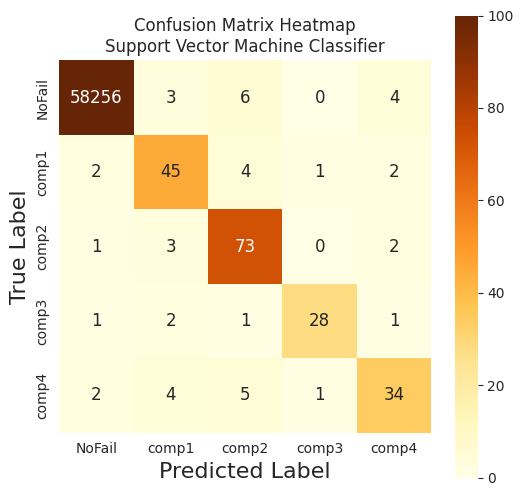

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svm_true_test = y_test.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(svm_true_test, svm_pred)

# Create a heatmap using seaborn with different colormaps for True Label ("Blues") and Predicted Label ("Greens")
plt.figure(figsize=(6, 6))

# True Label colormap ("Blues")
sns.heatmap(cm, annot=True, fmt="d", cmap='YlOrBr', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)  # Adjust vmin and vmax according to your data range

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nSupport Vector Machine Classifier', fontsize=12)

plt.show()

#Logistic Regression

Creating a Logistic Regression classifier with multinomial classification and the lbfgs solver, the model is trained on the training data and used to predict outcomes on the test set. The accuracy of the predictions is then evaluated and printed.


In [341]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Creating a Logistic Regression classifier with multinomial classification and specific solver
logreg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the classifier to the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
logreg_pred = logreg_classifier.predict(X_test)

# Accuracy Evaluation
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print(f"Accuracy: {logreg_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9992647184555667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mapping numeric labels to custom labels, the Logistic Regression model's true and predicted labels are flattened. Accuracies are calculated for each custom label, and the results are stored and printed using a mapping dictionary.

In [342]:
# Create a mapping dictionary for custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}
logreg_true_test = y_test.flatten()
logreg_pred = logreg_classifier.predict(X_test).flatten()

# Get unique numeric labels
unique_labels = np.unique(logreg_true_test)

# Create variables to store accuracies for each custom label
logreg_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (logreg_true_test == label).astype(int)
    label_pred = (logreg_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Use the mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    logreg_accuracy[f'logreg_accuracy_{custom_label}'] = label_accuracy

# Print the accuracy description
for key, value in logreg_accuracy.items():
    print(f'{key}: {value}')

logreg_accuracy_nofail: 0.9996751081547853
logreg_accuracy_comp1: 0.9996067098715822
logreg_accuracy_comp2: 0.999623809442383
logreg_accuracy_comp3: 0.9999145021459961
logreg_accuracy_comp4: 0.9997093072963869


A Confusion Matrix Heatmap illustrates the performance of the Logistic Regression Classifier on the test set. The colormap displays the distribution of true and predicted labels, providing insights into the model's classification accuracy across different categories.

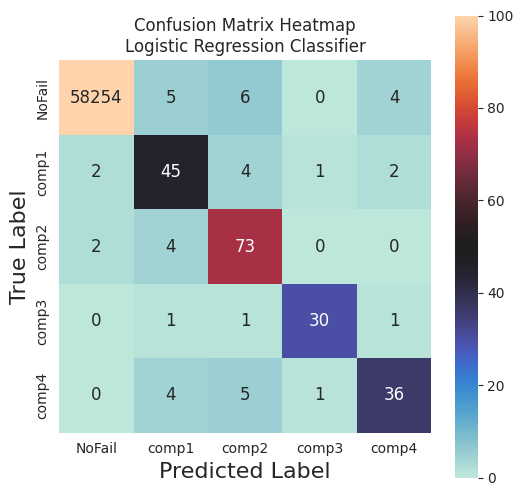

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logreg_true_test = y_test.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(logreg_true_test, logreg_pred)

# Create a heatmap using seaborn with different colormaps for True Label ("Blues") and Predicted Label ("Greens")
plt.figure(figsize=(6, 6))

# True Label colormap ("Blues")
sns.heatmap(cm, annot=True, fmt="d", cmap='icefire', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)  # Adjust vmin and vmax according to your data range

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nLogistic Regression Classifier', fontsize=12)

plt.show()

----
#MultiLayer Perceptron Neural Network

This snippet creates an MLP Neural Network classifier with two hidden layers (100 and 50 neurons respectively), trains it on the provided training data, predicts labels for the test set, and evaluates its accuracy, providing a concise summary of the model's performance.

In [344]:
from sklearn.neural_network import MLPClassifier

# Creating an MLP Classifier with 100 neurons in the first hidden layer and 50 neurons in the second
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)

# Fit the classifier to your training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
mlp_pred = mlp_classifier.predict(X_test)

# Accuracy Evaluation
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"MLP Neural Network Accuracy: {mlp_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP Neural Network Accuracy: 0.9990595236059575


This code segment maps numeric labels to custom labels for an MLP Neural Network, computes accuracy for each label, and stores the results. It then prints or utilizes the accuracies for further analysis, facilitating a comprehensive evaluation of the model's performance across different categories.

In [345]:
# Create a mapping dictionary for custom labels
label_mapping = {
    0: 'nofail',
    1: 'comp1',
    2: 'comp2',
    3: 'comp3',
    4: 'comp4'
}

mlp_true_test = y_test.flatten()
mlp_pred = mlp_classifier.predict(X_test)

# Get unique numeric labels
unique_labels = np.unique(mlp_true_test)

# Create variables to store accuracies for each custom label
mlp_accuracy = {}

# Calculate accuracy for each label
for label in unique_labels:
    label_true = (mlp_true_test == label).astype(int)
    label_pred = (mlp_pred == label).astype(int)
    label_accuracy = accuracy_score(label_true, label_pred)

    # Use the mapping dictionary to get the custom label
    custom_label = label_mapping[label]

    # Save accuracy to a variable
    mlp_accuracy[f'mlp_accuracy_{custom_label}'] = label_accuracy

# Print or use the accuracies as needed
for key, value in mlp_accuracy.items():
    print(f'{key}: {value}')

mlp_accuracy_nofail: 0.9995383115883791
mlp_accuracy_comp1: 0.9995554111591799
mlp_accuracy_comp2: 0.9995554111591799
mlp_accuracy_comp3: 0.999846103862793
mlp_accuracy_comp4: 0.999623809442383


This code generates a confusion matrix heatmap using seaborn for a Multilayer Perceptron (MLP) Neural Network classifier, visualizing the model's performance on the test set. The heatmap provides insights into the true and predicted labels, aiding in the interpretation of classification results.

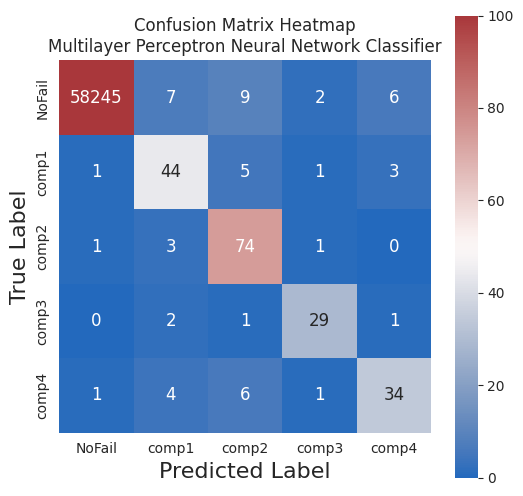

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mlp_true_test = y_test.flatten()

# Calculate the confusion matrix
cm = confusion_matrix(mlp_true_test, mlp_pred)

# Create a heatmap using seaborn
plt.figure(figsize=(6, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap='vlag', cbar=True,
            xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
            yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'], square=True, annot_kws={"size": 12},
            vmin=0, vmax=100)

plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.title('Confusion Matrix Heatmap\nMultilayer Perceptron Neural Network Classifier', fontsize=12)

plt.show()

----
#**Prediction Statistics**

This code creates a PrettyTable to display the accuracies of various classification models (Xgboost, Random Forest, K-Nearest Neighbor, SVM, Logistic Regression, MLP Neural Network) across different custom labels. The table is organized with columns representing model names and accuracy values for each custom label, providing a clear comparison of classification performance.

In [387]:
from prettytable import PrettyTable

# List of dictionaries
accuracy_dictionaries = [xgb_accuracy, rf_accuracy, knn_accuracy, svm_accuracy, logreg_accuracy, mlp_accuracy]

# Specify the Column Names
column_names = ["Classification Model Accuracy", "nofail", "comp1", "comp2", "comp3", 'comp4']
myTable = PrettyTable(column_names)

# Mapping of abbreviations to full names
model_name_mapping = {
    "Xgb": "Xgboost Classification",
    "Rf": "Random Forest Classification",
    "Knn": "K-Nearest Neighbor Classification",
    "Svm": "Support Vector Machine Classification",
    "Logreg": "Logistic Regression Classification",
    "Mlp": "Multilayer Perceptron Neural Network"
}

# Iterate over each dictionary
for accuracy_dict in accuracy_dictionaries:
    # Extract model name from the dictionary key
    model_name = list(accuracy_dict.keys())[0].split('_')[0].capitalize()  # Assumes keys are like 'model_accuracy_label'

    # Replace abbreviations with full names
    model_name = model_name_mapping.get(model_name, model_name)

    # Extract accuracy values
    accuracy_values = [f"{value}" for value in accuracy_dict.values()]

    # Add rows to PrettyTable
    myTable.add_row([model_name] + accuracy_values)

# Print the PrettyTable
print(myTable)


+---------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Classification Model Accuracy     |       nofail       |       comp1        |       comp2        |       comp3        |       comp4        |
+---------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|         Xgboost Classification        | 0.9998803030043946 | 0.9996580085839846 | 0.9996922077255861 | 0.9998632034335938 | 0.9997435064379884 |
|      Random Forest Classification     | 0.999846103862793  | 0.9996580085839846 | 0.9996922077255861 | 0.9998632034335938 | 0.9997093072963869 |
|   K-Nearest Neighbor Classification   | 0.9993673158803714 | 0.9995725107299807 | 0.9995725107299807 | 0.9997948051503908 | 0.9996409090131838 |
| Support Vector Machine Classification | 0.9996751081547853 | 0.9996409090131838 | 0.999623809442383  | 0.99988030300

This code generates a 2x3 grid of confusion matrix heatmaps, each representing the performance of a different machine learning classifier (XGBoost, Random Forest, K-Nearest Neighbors, Support Vector Machine, Logistic Regression, MLP Neural Network). The heatmaps visualize how well each classifier predicted different labels ('NoFail', 'comp1', 'comp2', 'comp3', 'comp4') compared to the true labels. The color intensity represents the number of instances in each category, providing a comprehensive visual assessment of the classifiers' performance.

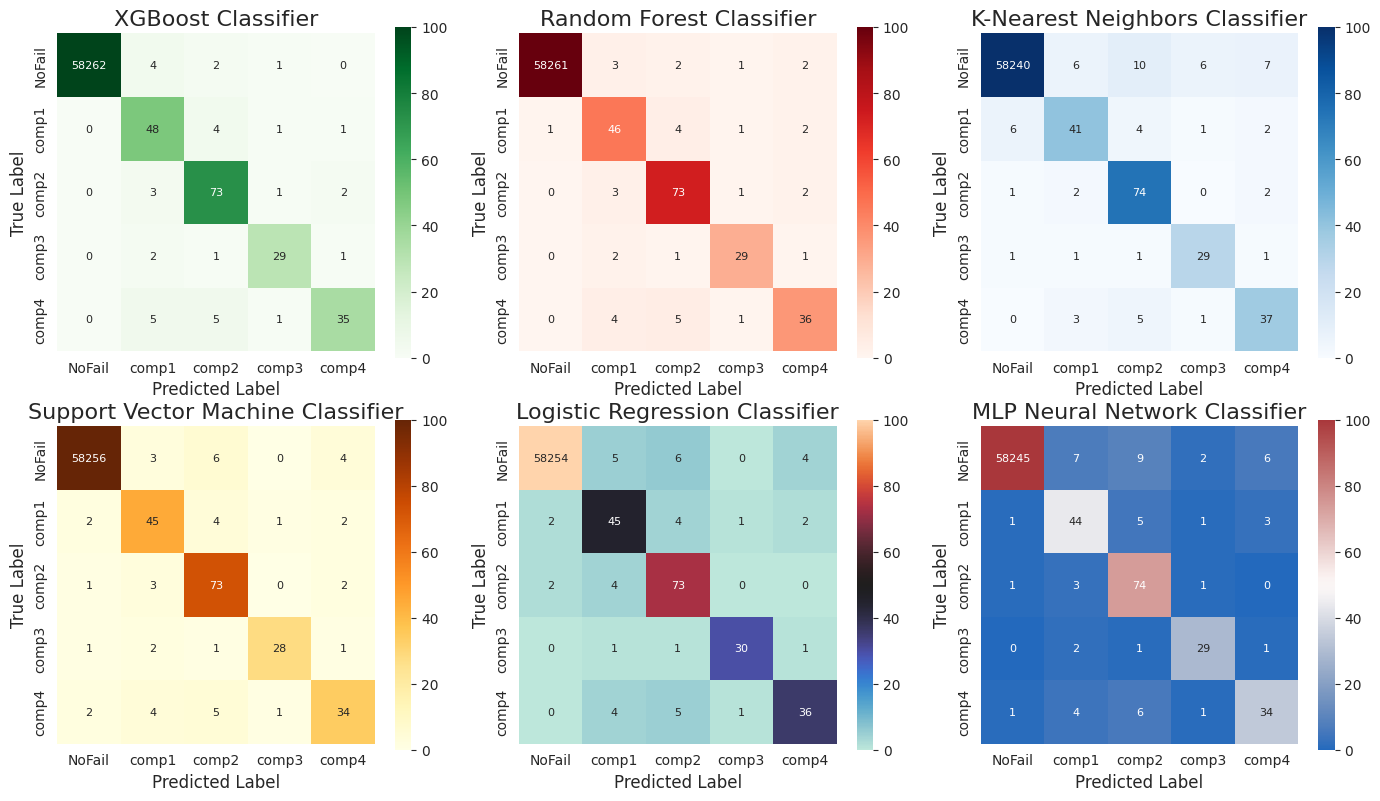

In [386]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define classifiers and their respective predictions
classifiers = [
    (xgboost_true_test, xgboost_pred, 'XGBoost', 'Greens'),
    (rf_true_test, rf_pred, 'Random Forest', 'Reds'),
    (knn_true_test, knn_pred, 'K-Nearest Neighbors', 'Blues'),
    (svm_true_test, svm_pred, 'Support Vector Machine', 'YlOrBr'),
    (logreg_true_test, logreg_pred, 'Logistic Regression', 'icefire'),
    (mlp_true_test, mlp_pred, 'MLP Neural Network', 'vlag')
]

# Set up the subplots for all six classifiers
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

for ax, (true_test, pred, title, cmap) in zip(axes.flatten(), classifiers):
    # Calculate confusion matrix
    cm = confusion_matrix(true_test, pred)

    # Plot heatmap
    sns.heatmap(
        cm, annot=True, fmt="d", cmap=cmap, cbar=True,
        xticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
        yticklabels=['NoFail', 'comp1', 'comp2', 'comp3', 'comp4'],
        square=True, annot_kws={"size": 8},
        vmin=0, vmax=100, ax=ax
    )

    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_title(f'{title} Classifier', fontsize=16)

plt.tight_layout()
plt.show()


----
#**Summary**
The presented statistics showcases the classification model accuracies across different failure categories, emphasizing the predictive performance of various machine learning algorithms. Notably from the accuracy metrics, all models exhibit exceptionally high accuracy rates, exceeding 99.9%, indicating their effectiveness in classifying equipment failures. The XGBoost and Random Forest classifiers consistently demonstrate near-perfect accuracy across all categories. The K-Nearest Neighbor and Support Vector Machine models also perform remarkably well, while Logistic Regression and Multilayer Perceptron Neural Network classifiers exhibit strong accuracy, emphasizing their suitability for predicting diverse failure scenarios. Overall, these results underscore the robustness and reliability of the employed classification algorithms in the context of predictive maintenance.

Also, from the heatmap, the label prediction is quite remarkable for all classification algorithm.
The best performance in terms of detecting nofail in demonstrated by **XGBoost Classification Algorithm**.

----